# Assignment

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries. You can start by exploring a few questions:

1. What type of content is available in different countries?
2. How has the number of movies released per year changed over the last 20-30 years?
3. Comparison of tv shows vs. movies.
4. What is the best time to launch a TV show?
5. Analysis of actors/directors of different types of shows/movies.
6. Does Netflix has more focus on TV Shows than movies in recent years?
7. Understanding what content is available in different countries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

In [4]:
df=pd.read_csv("netflix_data.csv")
df.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7441,s7442,Movie,Memory Games,"Janet Tobias, Claus Wehlisch",NaN,"Germany, United States, Sweden","June 19, 2019",2018,TV-14,86 min,Documentaries,Glimpse into the brain's vast potential for me...
1301,s1302,TV Show,Behind Her Eyes,NaN,"Simona Brown, Eve Hewson, Tom Bateman, Robert ...",United Kingdom,"February 17, 2021",2021,TV-MA,1 Season,"British TV Shows, International TV Shows, TV D...",A single mother enters a world of twisted mind...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Filling null values with mode as we cannot drop 10% of data

df['director']=df['director'].fillna(df['director'].mode()[0])
df['cast']=df['cast'].fillna(df['cast'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])

In [8]:
df=df.dropna()

In [9]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
#  splitting country column
df_expanded = df.assign(country=df['country'].str.split(', ')).explode('country')

In [104]:
# 1. What type of content is available in different countries?

content_type_in_countries_df = df_expanded.groupby(["country", "type"]).size().unstack(fill_value=0).reset_index().sort_values(by=['Movie','TV Show'], ascending=False)
content_type_in_countries_df.head(10)

type,country,Movie,TV Show
119,United States,3187,1322
47,India,962,84
117,United Kingdom,532,271
22,Canada,319,126
38,France,303,90
40,Germany,182,44
105,Spain,171,61
55,Japan,119,197
25,China,114,48
69,Mexico,111,58


<Axes: xlabel='country'>

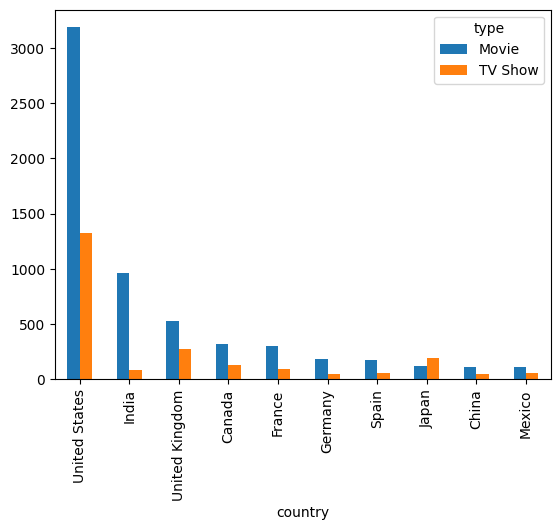

In [126]:
content_type_in_countries_df.head(10).plot(kind='bar', x='country', y=["Movie","TV Show"])

**Insights:** The above visualization shows the top 10 countries where Netflix is streamed maximum and out of all 10 countries, all countries except 'japan' has more number of 'Movie' streaming on Netflix as compared to 'TV Shows'.

In [12]:
# 2. How has the number of movies released per year changed over the last 20-30 years?

movies_released_per_year_df=df[(df["type"]=='Movie') & (df["release_year"]>1991)].groupby('release_year').size().reset_index(name='count')
movies_released_per_year_df.head()

,release_year,count
0,1992,20
1,1993,24
2,1994,20
3,1995,23
4,1996,21


<Axes: xlabel='release_year'>

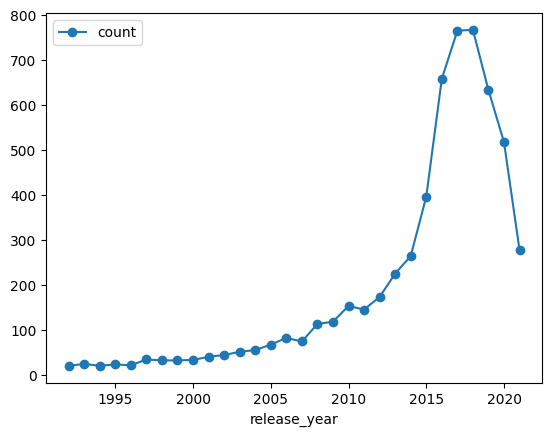

In [13]:
movies_released_per_year_df.plot(kind='line', x='release_year', y='count', marker='o')

**Insights**: The number of movies being relesed in past 20-30 years has constantly increased from 20 to 300 movies in year 1995 to 2015. After, 2015 there has been a jump in movie released from 400 to 700 movies. But, then it again dropped back to 300 movies in 2020

In [15]:
# 3. Comparison of tv shows vs. movies.

tv_vs_movies_df = df[(df["type"]=='Movie') | (df["type"]=='TV Show')].groupby(df['type']).size()
tv_vs_movies_df

type
Movie      6126
TV Show    2664
dtype: int64

<Axes: >

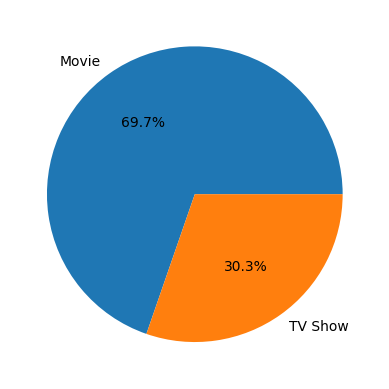

In [16]:
tv_vs_movies_df.plot(kind='pie', autopct='%1.1f%%')

**Insights:** The percentage of Movies is approximately 70% as compared to lower percentage of TV Shows which is 30%. It is highly likely that Netflix viewers like Movies more as compared to TV Shows. There might be the case that TV Show quality being streamed on Netflix is not at par to the Movies being streamed on the Netflix.

In [18]:
#  4. What is the best time to launch a TV show?

df['month_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.month
tvshows_moth_df=df[df['type'] == 'TV Show'].groupby('month_added').size()
tvshows_moth_df

month_added
1.0     181
2.0     174
3.0     205
4.0     209
5.0     187
6.0     232
7.0     254
8.0     230
9.0     246
10.0    210
11.0    199
12.0    249
dtype: int64

**Insights:** TV Shows should be launched in the month of July, September and December as from the dataet, we see that maximum number of TV Shows have been launched during this period only.

<Axes: xlabel='director'>

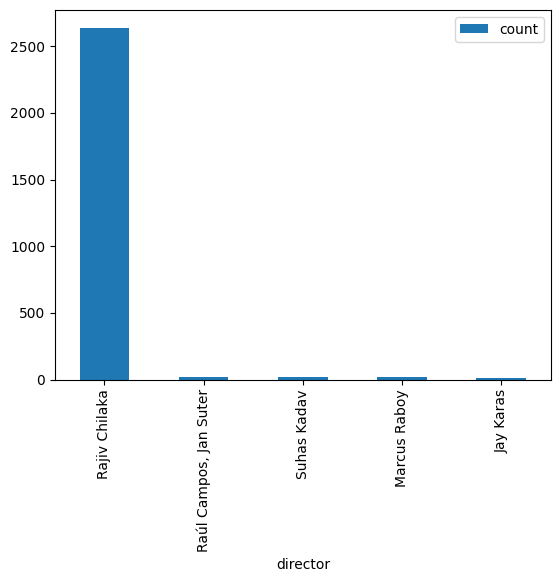

In [56]:
# 5. Analysis of actors/directors of different types of shows/movies.

actors_df=df.groupby("director").size().sort_values(ascending=False).reset_index(name='count')
actors_df.head(5)

actors_df.head(5).plot(kind='bar', x='director', y='count')

**Insights:** The above visualization shows the top 5 director of Netflix Movies and TV Shows.

<Axes: xlabel='type'>

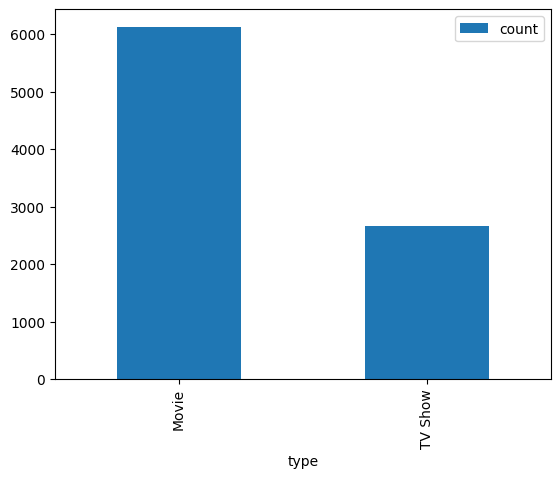

In [71]:
# Top 5 show/movies

top_shows_df=df.groupby("type").size().reset_index(name='count')
top_shows_df.head(5)

top_shows_df.head(5).plot(kind='bar', x='type', y='count')                                                   

**Insights:** The above viaulization shows the number of Movies and TV Shows released by netflix.

In [36]:
# 6. Does Netflix has more focus on TV Shows than movies in recent years?

# creating Pivot table
year_type_pivot = df.groupby(['release_year', 'type']).size().unstack(fill_value=0).reset_index()
year_type_pivot.tail(10)

type,release_year,Movie,TV Show
64,2012,173,63
65,2013,225,61
66,2014,264,88
67,2015,396,159
68,2016,658,243
69,2017,765,265
70,2018,767,379
71,2019,633,397
72,2020,517,436
73,2021,277,315


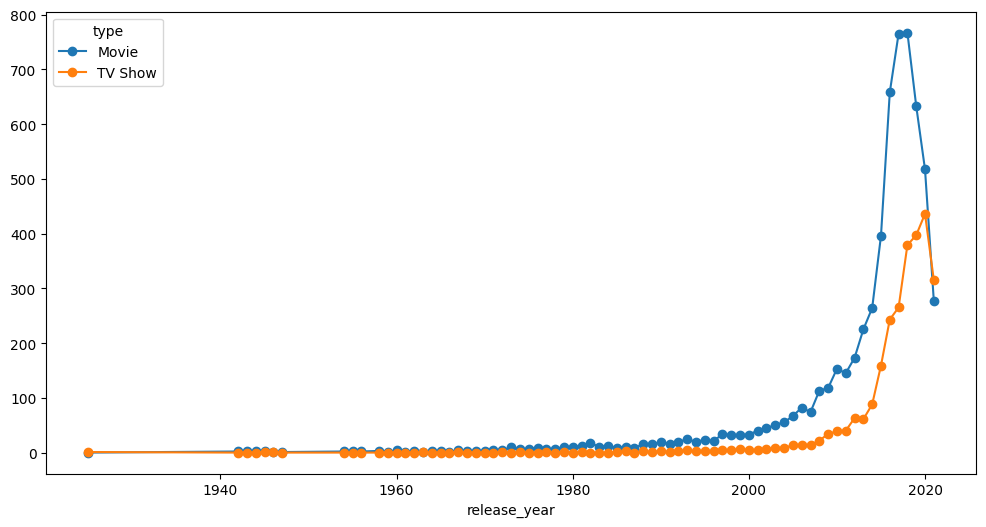

In [48]:
# visulization
year_type_pivot.reset_index().plot(kind='line', x='release_year', y=['Movie', 'TV Show'], marker='o', figsize=(12, 6))
plt.show()

**Insights:** Yes, Netflix has more focus on 'Movies' as compared to the 'TV Shows' in the recent years as we can see from the above visualization that initially both 'Movies' and 'TV Shows' were released on similar pace but, after the year 2000, there has been more 'Movie' releases as compared to the 'TV Shows'.

7. Understanding what content is available in different countries.

I have analyzed the top 10 countries where Netflix is streamed maximum and observed that out of all 10 countries, all countries except 'japan' has more number of 'Movie' streaming on Netflix as compared to 'TV Shows'.